In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# Load Dataset
file_path = "TASK-ML-INTERN.csv"
df = pd.read_csv(file_path)

In [8]:
# Task 1: Data Exploration & Preprocessing
# 1. Check for missing values
print("Missing Values:\n", df.isnull().sum().sum())

Missing Values:
 0


In [9]:
# 2. Drop rows with missing target values
df.dropna(subset=['vomitoxin_ppb'], inplace=True)

In [10]:
# 3. Extract Features & Target
X = df.drop(columns=['hsi_id', 'vomitoxin_ppb'])  # Exclude ID and target
y = df['vomitoxin_ppb']

In [11]:
# 4. Normalize Spectral Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

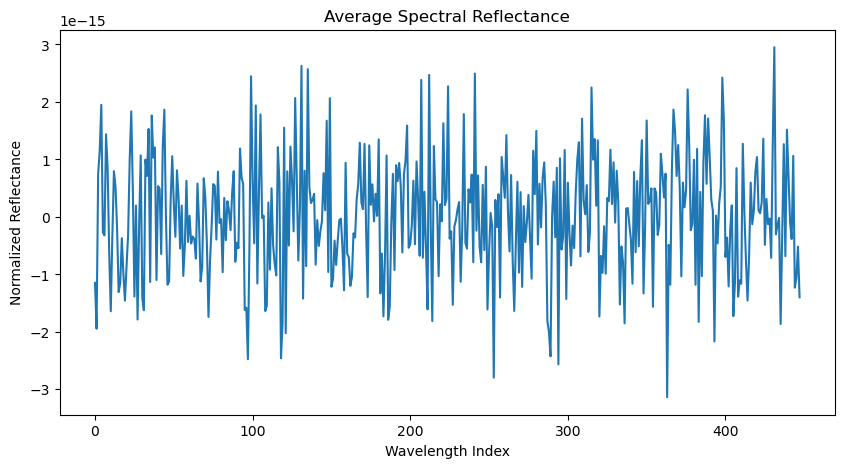

In [12]:
# 5. Visualize Spectral Data
plt.figure(figsize=(10, 5))
plt.plot(X_scaled.mean(axis=0))
plt.title("Average Spectral Reflectance")
plt.xlabel("Wavelength Index")
plt.ylabel("Normalized Reflectance")
plt.show()

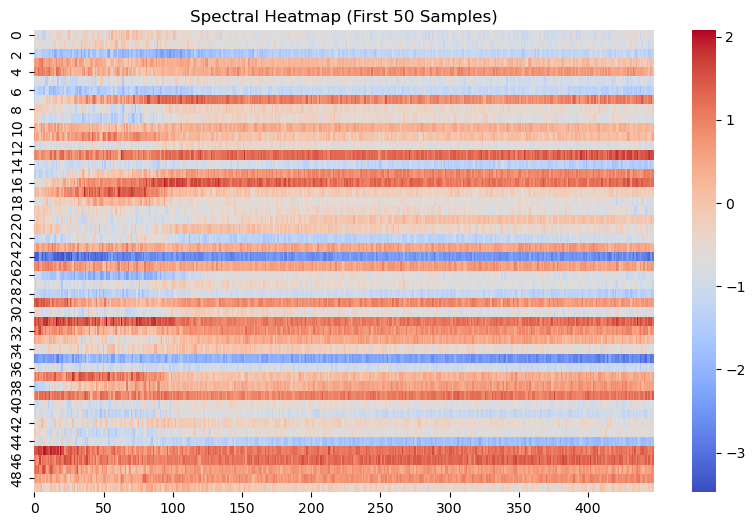

In [13]:
# Heatmap Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(X_scaled[:50], cmap="coolwarm", xticklabels=50)
plt.title("Spectral Heatmap (First 50 Samples)")
plt.show()

In [14]:
# Task 2: Dimensionality Reduction using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Top 3 Components: {explained_variance}")

Explained Variance by Top 3 Components: [0.87077909 0.05849069 0.02112294]


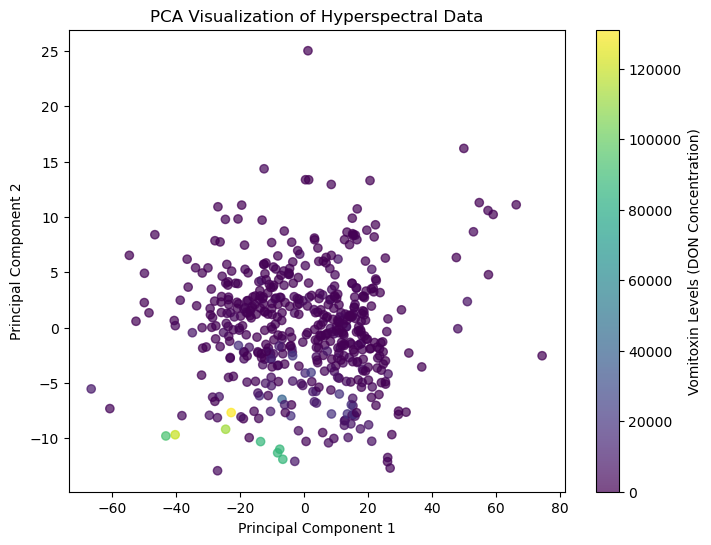

In [16]:
# PCA Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.colorbar(label="Vomitoxin Levels (DON Concentration)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Hyperspectral Data")
plt.show()

In [17]:
# Task 3: Model Training (Random Forest Regression)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [18]:
# Initialize and train Random Forest Model
model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [19]:
# Task 4: Model Evaluation
y_pred = model.predict(X_test)

In [20]:
# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

MAE: 1766.06, RMSE: 3630.07, R²: 0.95


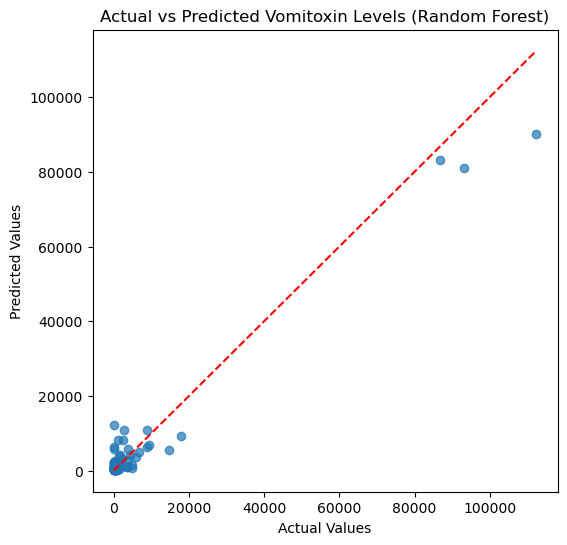

In [21]:
# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Vomitoxin Levels (Random Forest)")
plt.show()